# Understanding initial data
# 
>This file will be used to understand the data, for both data exploratory but mainly to see incremental changes on etl 

### Consumers data

In [30]:
import pandas as pd
import pyarrow.parquet as pq
from datetime import datetime
import seaborn as sns

In [2]:
# Reading file
df_consumers = pq.read_table("../data/extracted/consumers.parquet")
df_consumers = df_consumers.to_pandas()
df_consumers.head()


,customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number
0,e8cc60860e09c0bb19610b06ced69c973eb83982cfc98e...,pt-br,2018-04-05T14:49:18.165Z,True,NUNO,46,816135924
1,a2834a38a9876cf74e016524dd2e8c1f010ee12b2b684d...,pt-br,2018-01-14T21:40:02.141Z,True,ADRIELLY,59,231330577
2,41e1051728eba13341136d67d0757f8d8cc44b2a405b71...,pt-br,2018-01-07T03:47:15.554Z,True,PAULA,62,347597883
3,8e7c1dcb64edf95c935147f6d560cb068c44714cb1b21b...,pt-br,2018-01-10T22:17:08.160Z,True,HELTON,13,719366842
4,7823d4cf4150c5daeae0bd799206852fc123bdef0cf5d1...,pt-br,2018-04-06T00:16:20.935Z,True,WENDER,76,543232158


In [3]:
# Verifying data types
df_consumers.info()

# Judgement - NECESSARY TO CHANGE CREATE_AT DATA TYPE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806156 entries, 0 to 806155
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   customer_id            806156 non-null  object
 1   language               806156 non-null  object
 2   created_at             806156 non-null  object
 3   active                 806156 non-null  bool  
 4   customer_name          806155 non-null  object
 5   customer_phone_area    806156 non-null  int64 
 6   customer_phone_number  806156 non-null  int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 37.7+ MB


In [4]:
print(df_consumers.isnull().sum())

customer_id              0
language                 0
created_at               0
active                   0
customer_name            1
customer_phone_area      0
customer_phone_number    0
dtype: int64


In [5]:
# Quantity of active users
df_consumers['created_date'] = pd.to_datetime(df_consumers['created_at']).dt.date

df_consumers[["created_date", "customer_id"]].groupby("created_date") \
                                             .nunique() \
                                             .sort_values(by='customer_id', ascending=False) \
                                             .reset_index()

,created_date,customer_id
0,2018-04-06,191054
1,2018-04-05,121104
2,2018-01-03,49160
3,2018-01-02,36792
4,2018-01-07,36197
...,...,...
90,2018-03-28,555
91,2018-04-02,530
92,2018-04-03,492
93,2018-03-27,480


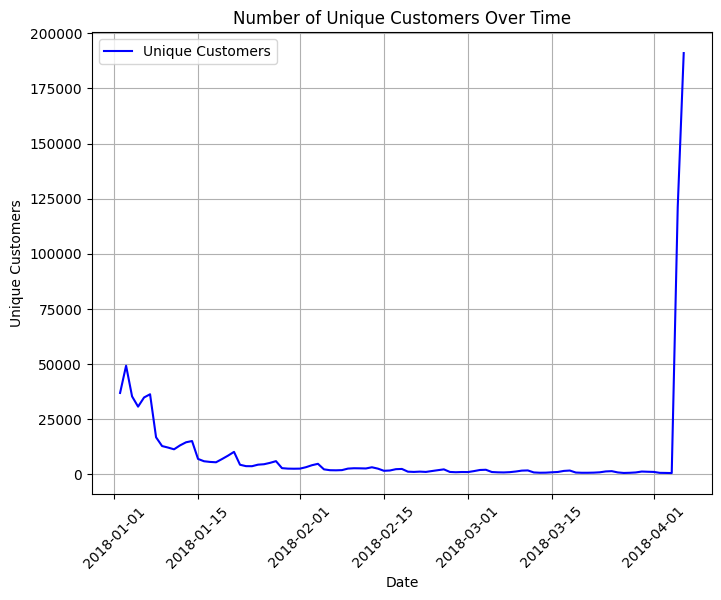

In [6]:
import matplotlib.pyplot as plt

# Aggregating unique customer count by created_date
df_grouped = df_consumers[["created_date", "customer_id"]].groupby("created_date").nunique().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(df_grouped["created_date"], df_grouped["customer_id"], linestyle="-", color="b", label="Unique Customers")

# Formatting information for display
plt.xlabel("Date")
plt.ylabel("Unique Customers")
plt.title("Number of Unique Customers Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [7]:
df_consumers[df_consumers['created_at'].str.contains('2018-04-06')].head()

,customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number,created_date
4,7823d4cf4150c5daeae0bd799206852fc123bdef0cf5d1...,pt-br,2018-04-06T00:16:20.935Z,True,WENDER,76,543232158,2018-04-06
14,5a2ad15e9ddf745adc7f0b355491f0815e583666bb21f4...,pt-br,2018-04-06T02:56:13.915Z,True,SAMUEL,56,746582509,2018-04-06
15,435346c38095dffef797a3f39cb982dc7a83c8b3673c1b...,pt-br,2018-04-06T04:25:40.847Z,True,RICKY,85,987206495,2018-04-06
30,e5b253944d52a7d30c1a7fd29cda81d80b0959b77786da...,pt-br,2018-04-06T04:14:52.995Z,True,RICARDO,50,975691498,2018-04-06
32,f505553ebe6d7e174d1f3cb9dfc29a3f3d9daa41926943...,pt-br,2018-04-06T01:32:13.045Z,True,DEFAULT,47,760429973,2018-04-06


In [8]:
# Amount of active / inactive customers -> Only less than 1% is inactive, not relevant enough
df_consumers[["customer_id", "active"]].groupby("active").nunique()

,customer_id
active,
False,1595
True,804561


In [9]:
# Dictionary with the relation of DDD and states
state_ddd = {
    11: "SP", 12: "SP", 13: "SP", 14: "SP", 15: "SP", 16: "SP", 17: "SP", 18: "SP", 19: "SP",
    21: "RJ", 22: "RJ", 24: "RJ",
    27: "ES", 28: "ES",
    31: "MG", 32: "MG", 33: "MG", 34: "MG", 35: "MG", 37: "MG", 38: "MG",
    41: "PR", 42: "PR", 43: "PR", 44: "PR", 45: "PR", 46: "PR",
    47: "SC", 48: "SC", 49: "SC",
    51: "RS", 53: "RS", 54: "RS", 55: "RS",
    61: "DF",
    62: "GO", 64: "GO",
    63: "TO",
    65: "MT", 66: "MT",
    67: "MS",
    68: "AC",
    69: "RO",
    71: "BA", 73: "BA", 74: "BA", 75: "BA", 77: "BA", 79: "SE",
    81: "PE", 87: "PE",
    82: "AL",
    83: "PB",
    84: "RN",
    85: "CE", 88: "CE",
    86: "PI", 89: "PI",
    91: "PA", 93: "PA", 94: "PA",
    92: "AM", 97: "AM",
    95: "RR",
    96: "AP",
    98: "MA", 99: "MA"
}

In [10]:
# Add a new column to map the states
df_consumers["customer_state"] = df_consumers["customer_phone_area"].map(state_ddd)
df_consumers.isna().count()


customer_id              806156
language                 806156
created_at               806156
active                   806156
customer_name            806156
customer_phone_area      806156
customer_phone_number    806156
created_date             806156
customer_state           806156
dtype: int64

In [11]:
print("Amount of customer with state:", df_consumers["customer_state"].count())
print("Amount of customer without a state:", df_consumers["customer_state"].isna().count())

Amount of customer with state: 539926
Amount of customer without a state: 806156


<br></br>
## Restaurants Data

In [12]:
df_restaurants = pq.read_table("../data/extracted/restaurants.parquet")
df_restaurants = df_restaurants.to_pandas()
df_restaurants.head()

,id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
0,d19ff6fca6288939bff073ad0a119d25c0365c407e9e5d...,2017-01-23T12:52:30.910Z,False,3,60.0,0,50.0,30.0,14025,RIBEIRAO PRETO,SP,BR
1,631df0985fdbbaf27b9b031a8f381924e3483833385748...,2017-01-20T13:14:48.286Z,True,3,60.0,0,0.0,30.0,50180,SAO PAULO,SP,BR
2,135c5c4ae4c1ec1fdc23e8c649f313e39be8db913d8bc5...,2017-01-23T12:46:33.457Z,True,5,100.0,0,45.0,10.0,23090,RIO DE JANEIRO,RJ,BR
3,d26f84c470451f752bef036c55517b6d9950d41806f10e...,2017-01-20T13:15:04.806Z,True,3,80.0,0,0.0,18.9,40255,SALVADOR,BA,BR
4,97b9884600ea7192314580d9115f8882b8634f5aa201ff...,2017-01-20T13:14:27.701Z,True,3,60.0,0,0.0,25.0,64600,BARUERI,SP,BR


In [13]:
# Checking types
#   Changes -> created_at - to date
print(df_restaurants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7292 non-null   object 
 1   created_at           7292 non-null   object 
 2   enabled              7292 non-null   bool   
 3   price_range          7292 non-null   int64  
 4   average_ticket       7292 non-null   float64
 5   takeout_time         7292 non-null   int64  
 6   delivery_time        7291 non-null   float64
 7   minimum_order_value  7197 non-null   float64
 8   merchant_zip_code    7292 non-null   int64  
 9   merchant_city        7292 non-null   object 
 10  merchant_state       7292 non-null   object 
 11  merchant_country     7292 non-null   object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 633.9+ KB
None


In [14]:
# Checking for missing values
print(df_restaurants.isnull().sum())

id                      0
created_at              0
enabled                 0
price_range             0
average_ticket          0
takeout_time            0
delivery_time           1
minimum_order_value    95
merchant_zip_code       0
merchant_city           0
merchant_state          0
merchant_country        0
dtype: int64


In [15]:
# Summary statistics
print(df_restaurants.describe())

       price_range  average_ticket  takeout_time  delivery_time  \
count  7292.000000     7292.000000   7292.000000    7291.000000   
mean      2.561300       53.726824      3.183900      28.034975   
std       1.180094       19.562103      8.422498      25.246657   
min       1.000000        0.000000      0.000000       0.000000   
25%       2.000000       40.000000      0.000000       0.000000   
50%       3.000000       60.000000      0.000000      35.000000   
75%       3.000000       60.000000      0.000000      50.000000   
max       5.000000      100.000000     60.000000     285.000000   

       minimum_order_value  merchant_zip_code  
count          7197.000000        7292.000000  
mean             28.797759       46125.429923  
std            1178.642727       25936.938647  
min               0.000000           0.000000  
25%               0.000000       22640.000000  
50%              15.000000       41230.000000  
75%              21.900000       70050.000000  
max         

In [35]:
# Count of restaurants by city
city_counts = df_restaurants['merchant_city'].value_counts()
print(city_counts)

# Count of restaurants by state
state_counts = df_restaurants['merchant_state'].value_counts()
print(state_counts)

merchant_city
SAO PAULO         1785
RIO DE JANEIRO     938
BRASILIA           359
BELO HORIZONTE     337
FORTALEZA          197
                  ... 
ANANINDEUA           1
PIRAQUARA            1
PETROPOLIS           1
JAU                  1
BLUMENAU             1
Name: count, Length: 155, dtype: int64
merchant_state
SP    3121
RJ    1161
MG     538
DF     359
PR     335
RS     250
CE     199
BA     190
SC     181
PE     176
GO     150
ES     114
RN      90
PB      85
AM      56
PA      50
MS      41
SE      30
AL      29
MA      20
MT      15
AC       3
PI       3
Name: count, dtype: int64


In [27]:
df_restaurants[df_restaurants["minimum_order_value"] > 250]

,id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
3148,f9f6289912cbaa8987e059ee895ea2b3cf2dd7f68a6c50...,2017-01-20T13:15:01.092Z,True,1,30.0,0,0.0,100000.0,21381,RIO DE JANEIRO,RJ,BR


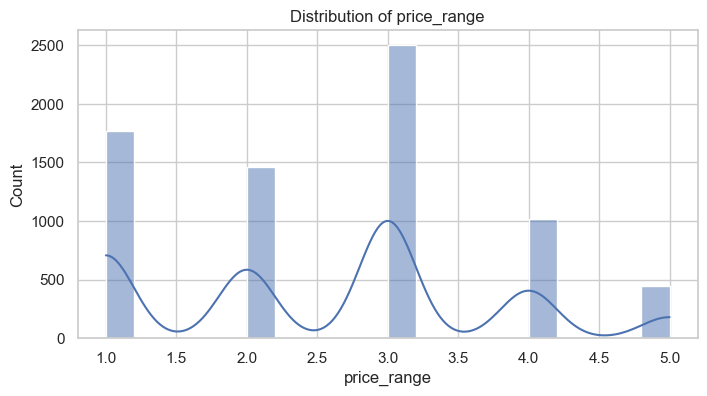

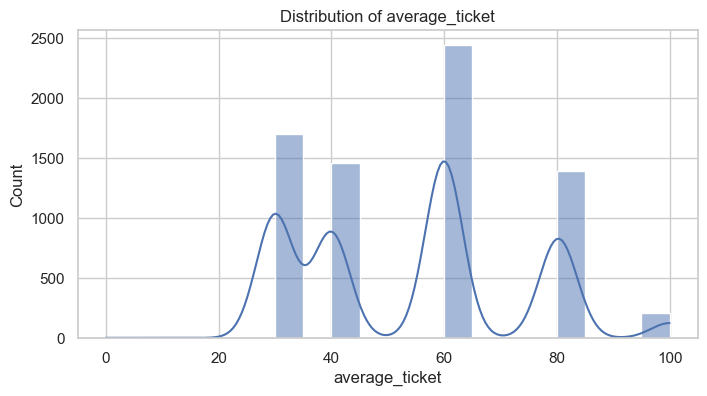

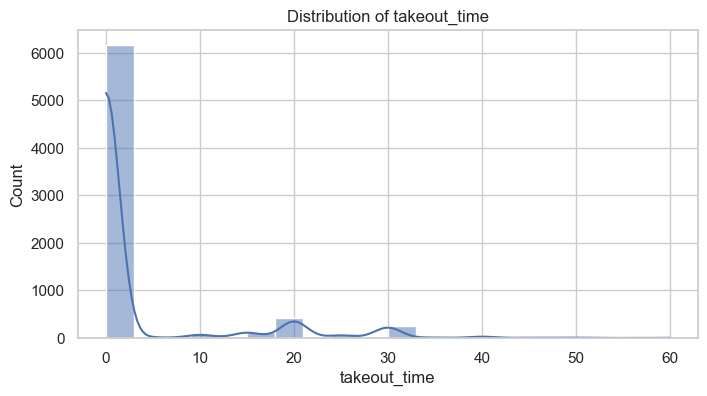

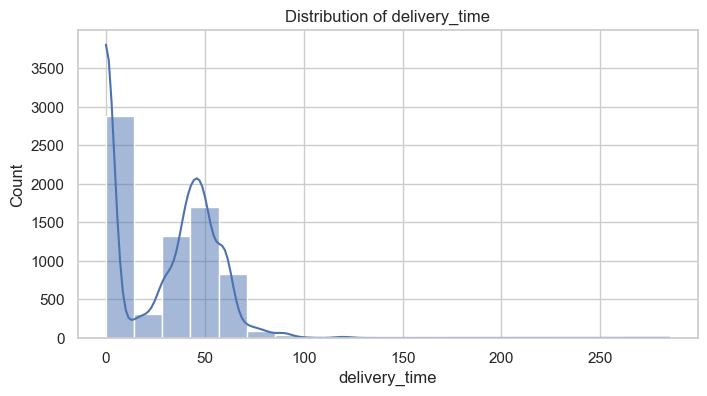

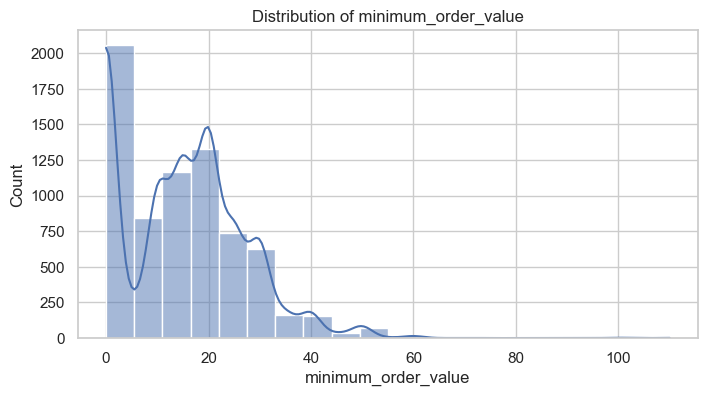

In [32]:
# Removing outlier in minimum order value
df_restaurants = df_restaurants[df_restaurants["minimum_order_value"] < 250]

# Plot data for each metric column
kpi_columns = ['price_range', 'average_ticket', 'takeout_time', 'delivery_time', 'minimum_order_value']
for col in kpi_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_restaurants[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

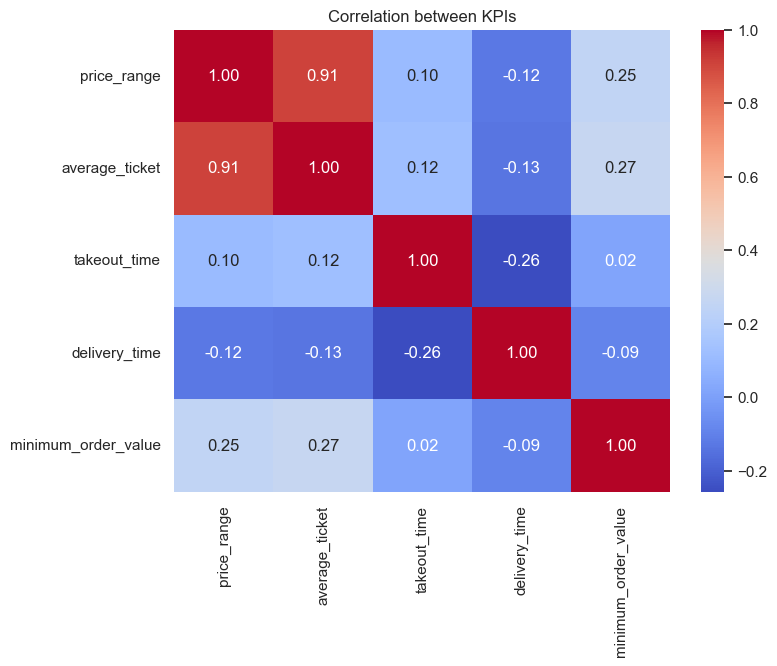

In [34]:
# Correlation between metrics
corr = df_restaurants[kpi_columns].corr()

# Plot correlation 
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between KPIs')
plt.show()

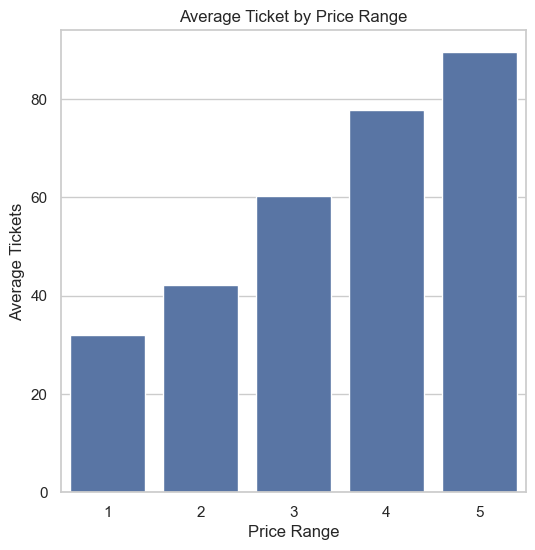

In [38]:
# Group by price_range and calculate mean average_ticket
price_ticket = df_restaurants.groupby('price_range')['average_ticket'].mean().reset_index()

# Plot relation between them
plt.figure(figsize=(6, 6))
sns.barplot(x='price_range', y='average_ticket', data=price_ticket)

plt.title('Average Ticket by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Tickets')

plt.show()

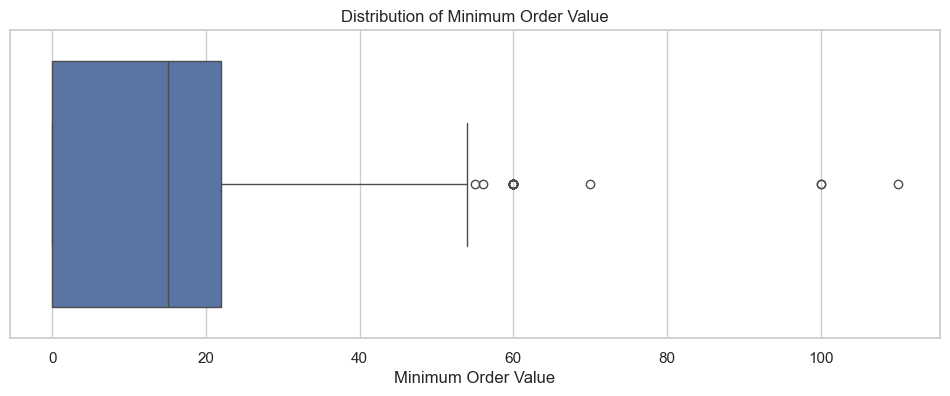

In [44]:
# Boxplot of minimum_order_value
plt.figure(figsize=(12, 4))

sns.boxplot(x=df_restaurants['minimum_order_value'])
plt.title('Distribution of Minimum Order Value')
plt.xlabel('Minimum Order Value')

plt.show()

# The median is ~18; meaning that 50% of the base has the min order value equal or lower than that 
# As the box goes until ~20, this means that we have a lower variability
# There's only a few outliers with over 60

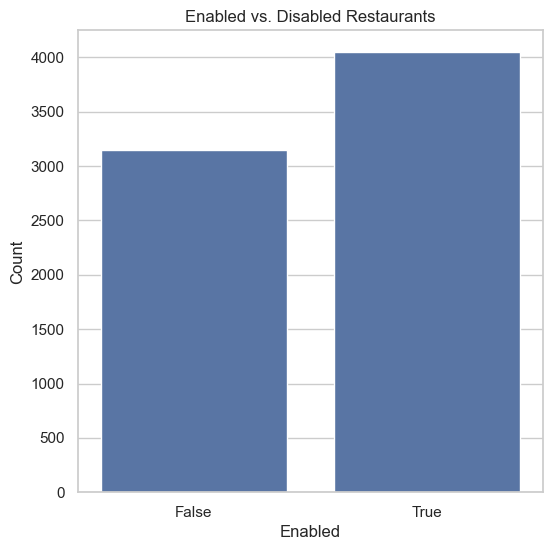

In [45]:
# Count of enabled vs. disabled restaurants
enabled_counts = df_restaurants['enabled'].value_counts()

# Plot the count
plt.figure(figsize=(6, 6))

sns.barplot(x=enabled_counts.index, y=enabled_counts.values)

plt.title('Enabled vs. Disabled Restaurants')
plt.xlabel('Enabled')
plt.ylabel('Count')

plt.show()

# Almost half of the restaurants are disabled, showing a big turnover of restaurants in the platform